In [13]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [15]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [20]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [21]:
build_model(my_learning_rate)
train_model(model, feature, label, epochs)

NameError: name 'my_learning_rate' is not defined

In [22]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

/Users/robertj.squires/Documents/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
12/12 [==============================] - 0s 635us/step - loss: 143.8460 - root_mean_squared_error: 11.9936
Epoch 2/100
12/12 [==============================] - 0s 554us/step - loss: 61.8282 - root_mean_squared_error: 7.8631
Epoch 3/100
12/12 [==============================] - 0s 622us/step - loss: 24.4339 - root_mean_squared_error: 4.9431
Epoch 4/100
12/12 [==============================] - 0s 684us/step - loss: 6.9808 - root_mean_squared_error: 2.6421
Epoch 5/100
12/12 [==============================] - 0s 620us/step - loss: 1.7612 - root_mean_squared_error: 1.3271
Epoch 6/100
12/12 [==============================] - 0s 703us/step - loss: 1.0569 - root_mean_squared_error: 1.0280
Epoch 7/100
12/12 [==============================] - 0s 556us/step - loss: 1.1749 - root_mean_squared_error: 1.0839
Epoch 8/100
12/12 [==============================] - 0s 661us/step - loss: 0.9199 - root_mean_squared_error: 0.9591
Epoch 9/100
12/12 [==============================] - 0s 665us/step 

12/12 [==============================] - 0s 582us/step - loss: 1.1601 - root_mean_squared_error: 1.0771
Epoch 72/100
12/12 [==============================] - 0s 614us/step - loss: 1.1769 - root_mean_squared_error: 1.0848
Epoch 73/100
12/12 [==============================] - 0s 590us/step - loss: 1.0509 - root_mean_squared_error: 1.0251
Epoch 74/100
12/12 [==============================] - 0s 621us/step - loss: 1.1714 - root_mean_squared_error: 1.0823
Epoch 75/100
12/12 [==============================] - 0s 627us/step - loss: 0.7563 - root_mean_squared_error: 0.8696
Epoch 76/100
12/12 [==============================] - 0s 565us/step - loss: 1.3947 - root_mean_squared_error: 1.1810
Epoch 77/100
12/12 [==============================] - 0s 560us/step - loss: 1.1145 - root_mean_squared_error: 1.0557
Epoch 78/100
12/12 [==============================] - 0s 582us/step - loss: 1.2185 - root_mean_squared_error: 1.1039
Epoch 79/100
12/12 [==============================] - 0s 583us/step - loss: 1

/Users/robertj.squires/Documents/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  True


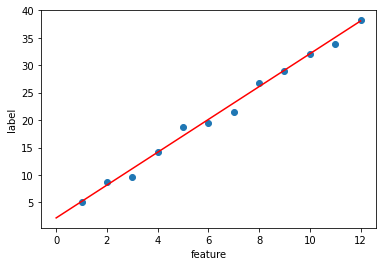

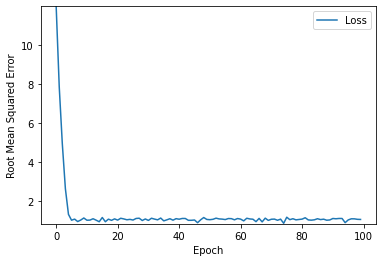

In [32]:
lr = 0.05
epochs = 100
my_batch_size = 1

my_model = build_model(lr)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)